In [ ]:
import torchvision
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from torchvision import transforms
mnist = torchvision.datasets.MNIST(root='.', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 68344458.80it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 72536343.61it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29521910.83it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11973933.86it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
def continue_training():
    network.train()
    for i in range(10):
        correct = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = network(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)

    correct = 0
    network.eval()
    for data, target in test_loader:
        output = network(data)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


In [ ]:


class Net(nn.Module):
    def __init__(self, drop):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.dropout = nn.Dropout(drop)  # Dropout layer with 50% dropout probability
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Applying dropout after the first fully connected layer
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # Make sure to specify the dimension for log_softmax


<ipython-input-4-5300217b5abc>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.8411999940872192
Iteration 1 Testing accuracy: 0.8658000230789185
Iteration 2 Training accuracy: 0.9401999711990356
Iteration 2 Testing accuracy: 0.928600013256073
Iteration 3 Training accuracy: 0.9613999724388123
Iteration 3 Testing accuracy: 0.9399999976158142
Iteration 4 Training accuracy: 0.972599983215332
Iteration 4 Testing accuracy: 0.9521999955177307
Iteration 5 Training accuracy: 0.978600025177002
Iteration 5 Testing accuracy: 0.9571999907493591
Iteration 1 Training accuracy: 0.6467999815940857
Iteration 1 Testing accuracy: 0.6442000269889832
Iteration 2 Training accuracy: 0.9261999726295471
Iteration 2 Testing accuracy: 0.9169999957084656
Iteration 3 Training accuracy: 0.9617999792098999
Iteration 3 Testing accuracy: 0.9417999982833862
Iteration 4 Training accuracy: 0.9688000082969666
Iteration 4 Testing accuracy: 0.9473999738693237
Iteration 5 Training accuracy: 0.9782000184059143
Iteration 5 Testing accuracy: 0.9531999826431274
Iteration 1 T

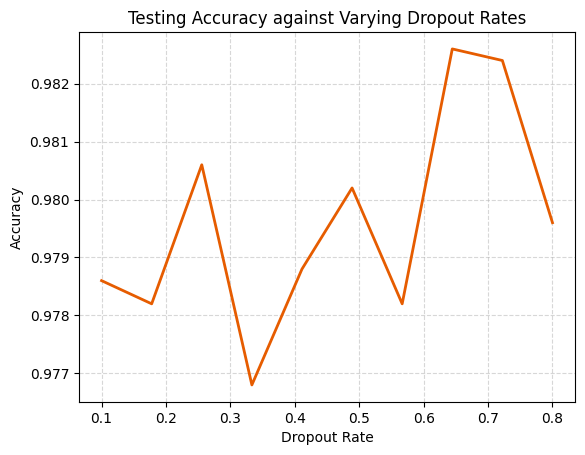

In [ ]:
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                        batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                        batch_size=1000, shuffle=True)

conv_graph_train = []
conv_graph_test = []

numbers = np.linspace(0.1, 0.8, 10)
for i in numbers:
    network = Net()
    optimizer = optim.SGD(network.parameters(), lr=0.1, momentum=0.5)
    accuracy_train = []
    accuracy_test = []
    for j in range(5):
        continue_training()


    conv_graph_train.append(accuracy_train[-1])
    conv_graph_test.append(accuracy_train[-1])



plt.plot()
plt.plot(numbers, conv_graph_test, label='Testing Average', color='#e65c00', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.5)


plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy against Varying Dropout Rates')

plt.show()




Iteration 1 Training accuracy: 0.8133999705314636
Iteration 1 Testing accuracy: 0.8407999873161316
Iteration 2 Training accuracy: 0.9261999726295471
Iteration 2 Testing accuracy: 0.9251999855041504
Iteration 3 Training accuracy: 0.9516000151634216
Iteration 3 Testing accuracy: 0.9484000205993652
Iteration 4 Training accuracy: 0.9649999737739563
Iteration 4 Testing accuracy: 0.9552000164985657
Iteration 5 Training accuracy: 0.9742000102996826
Iteration 5 Testing accuracy: 0.95660001039505
Iteration 6 Training accuracy: 0.9796000123023987
Iteration 6 Testing accuracy: 0.9588000178337097
Iteration 7 Training accuracy: 0.9825999736785889
Iteration 7 Testing accuracy: 0.9613999724388123
Iteration 8 Training accuracy: 0.9854000210762024
Iteration 8 Testing accuracy: 0.965399980545044
Iteration 9 Training accuracy: 0.9890000224113464
Iteration 9 Testing accuracy: 0.9613999724388123
Iteration 10 Training accuracy: 0.9919999837875366
Iteration 10 Testing accuracy: 0.9648000001907349
Iteration 1

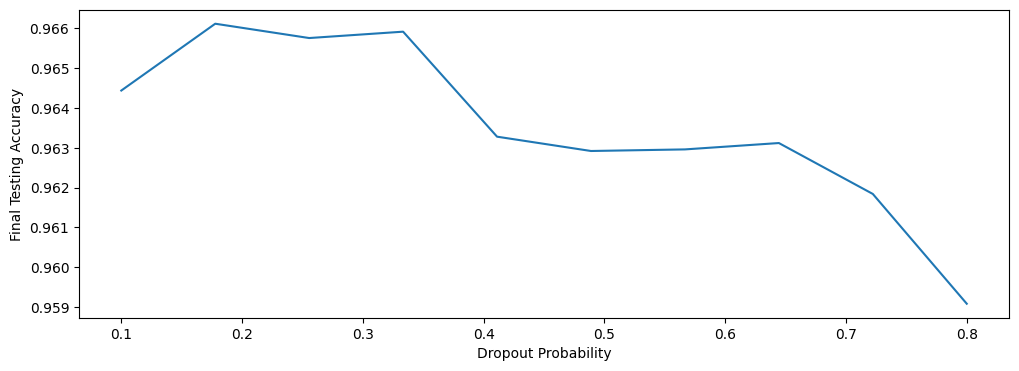

In [ ]:
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)),
                                        batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)),
                                        batch_size=1000, shuffle=True)



final_testing_accuracy = []
drop_rates = np.linspace(0.1, 0.8, 10)

for r in drop_rates:
    total_accuracy = 0
    for j in range(5):
        network = Net(r)
        optimizer = optim.SGD(network.parameters(), lr=0.1, momentum=0.5)
        accuracy_train = []
        accuracy_test = []
        for i in range(10):
            continue_training()

        total_accuracy += accuracy_test[-1]
    final_testing_accuracy.append(total_accuracy / 5)


plt.figure(figsize=(12,4))
plt.plot(drop_rates, final_testing_accuracy)
plt.xlabel('Dropout Probability')
plt.ylabel('Final Testing Accuracy')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='RdYlGn', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

NameError: name 'plt' is not defined